In [2]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
import pandas as pd
import numpy as np

## Read Data

In [3]:
df = pd.read_csv('../input/Tweets.csv')

df['text']


0                      @VirginAmerica What @dhepburn said.
1        @VirginAmerica plus you've added commercials t...
2        @VirginAmerica I didn't today... Must mean I n...
3        @VirginAmerica it's really aggressive to blast...
4        @VirginAmerica and it's a really big bad thing...
5        @VirginAmerica seriously would pay $30 a fligh...
6        @VirginAmerica yes, nearly every time I fly VX...
7        @VirginAmerica Really missed a prime opportuni...
8          @virginamerica Well, I didn't…but NOW I DO! :-D
9        @VirginAmerica it was amazing, and arrived an ...
10       @VirginAmerica did you know that suicide is th...
11       @VirginAmerica I &lt;3 pretty graphics. so muc...
12       @VirginAmerica This is such a great deal! Alre...
13       @VirginAmerica @virginmedia I'm flying your #f...
14                                  @VirginAmerica Thanks!
15           @VirginAmerica SFO-PDX schedule is still MIA.
16       @VirginAmerica So excited for my first cross c.

# Data Analysis
## Some Insights

In [4]:
sentiment_counts = df.airline_sentiment.value_counts()
number_of_tweets = df.tweet_id.count()
print(sentiment_counts)


negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64


In [5]:
dff = df.groupby(["airline", "airline_sentiment" ]).count()["name"]
dff['American']

airline_sentiment
negative    1960
neutral      463
positive     336
Name: name, dtype: int64

## Converting sentiments of indivual airline into percentages

In [6]:
airlines=df.airline.unique()
positive_percentage = []
negative_percentage = []
neutral_percentage = []
for i in airlines:
    positive_percentage.append((dff[i].positive/dff[i].sum())*100)
    negative_percentage.append((dff[i].negative/dff[i].sum())*100)
    neutral_percentage.append((dff[i].neutral/dff[i].sum())*100)
percentage_data = [positive_percentage,negative_percentage,neutral_percentage]
percentage_data = np.array(percentage_data)
percentage_data=percentage_data.reshape(6,3)

In [7]:
my_series = pd.DataFrame(data=percentage_data, index =airlines)
my_series[0] = positive_percentage
my_series[1] = negative_percentage
my_series[2] = neutral_percentage
my_series

,0,1,2
Virgin America,30.158730,35.912698,33.928571
United,12.872841,68.890633,18.236525
Southwest,23.553719,49.008264,27.438017
Delta,24.482448,42.979298,32.538254
US Airways,9.234466,77.686234,13.079300
American,12.178325,71.040232,16.781443


## Chart displays the sentiment of each airline in percentage

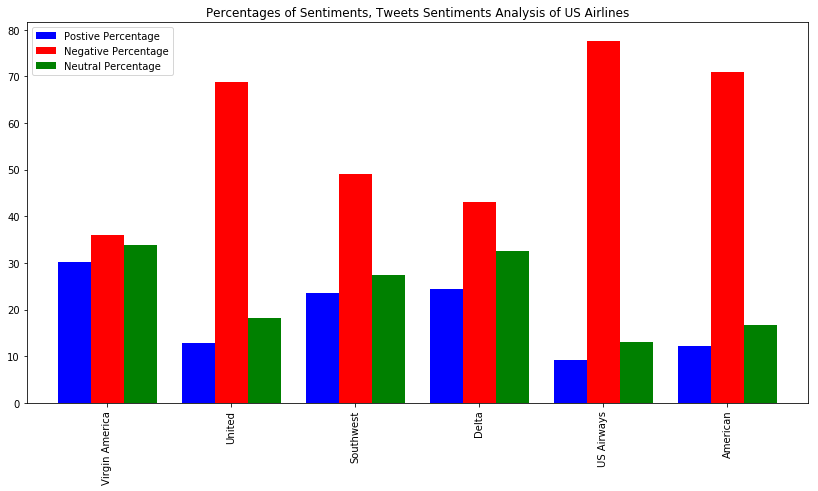

In [8]:
import matplotlib.pyplot as plt
import matplotlib.style
%matplotlib inline
import matplotlib.style
from matplotlib.pyplot import subplots

fig, ax = subplots()
my_colors =['blue','red','green']
my_series.plot(kind='bar', stacked=False, ax=ax, color=my_colors, figsize=(14, 7), width=0.8)
ax.legend(["Postive Percentage","Negative Percentage","Neutral Percentage"])
plt.title("Percentages of Sentiments, Tweets Sentiments Analysis of US Airlines")
plt.show()

# Data Preprocessing

## As we are interested in only 2 columns for our purpose of classfication, we are taking subset of whole data frame

In [9]:
data = df[['text','airline_sentiment']]
data.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


## Converting labels into integers 
### neutral = 0
### positive = 1
### negative = 2

In [10]:
data.loc[:,('airline_sentiment')] = data.airline_sentiment.map({'neutral':0, 'positive':1,'negative':2})
data.head()

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:630: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,0
1,@VirginAmerica plus you've added commercials t...,1
2,@VirginAmerica I didn't today... Must mean I n...,0
3,@VirginAmerica it's really aggressive to blast...,2
4,@VirginAmerica and it's a really big bad thing...,2


## Seperating rows based on their labels

In [11]:
positive_sentiment_words = ''
negative_sentiment_words = ''
neutral_sentiment_words = ''
neutral = data[data.airline_sentiment == 0]
positive = data[data.airline_sentiment ==1]
negative = data[data.airline_sentiment ==2]

## Tokenizing, Lematizing and removing stop words from data

In [12]:
import nltk,re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words('english'))
wordnet_lemmatizer = WordNetLemmatizer()
for val in neutral.text:
    text = val.lower()
    only_letters = re.sub("[^a-zA-Z]", " ",text) 
    tokens = nltk.word_tokenize(only_letters )[2:]
    for word in tokens:
        if word not in stop_words:
            word = wordnet_lemmatizer.lemmatize(word)
            neutral_sentiment_words =  neutral_sentiment_words + word + ' '
            
for val in positive.text:
    text = val.lower()
    only_letters = re.sub("[^a-zA-Z]", " ",text) 
    tokens = nltk.word_tokenize(only_letters )[2:]
    for word in tokens:
        if word not in stop_words:
            word = wordnet_lemmatizer.lemmatize(word)
            positive_sentiment_words =  positive_sentiment_words + word + ' '
            
for val in negative.text:
    text = val.lower()
    only_letters = re.sub("[^a-zA-Z]", " ",text) 
    tokens = nltk.word_tokenize(only_letters )[2:]
    for word in tokens:
        if word not in stop_words:
            word = wordnet_lemmatizer.lemmatize(word)
            negative_sentiment_words =  negative_sentiment_words + word + ' '
            
            


# WordCloud

In [13]:
from wordcloud import WordCloud
neutral_wordcloud = WordCloud(width=600, height=400).generate(neutral_sentiment_words)
positive_wordcloud = WordCloud(width=600, height=400).generate(positive_sentiment_words)
negative_wordcloud = WordCloud(width=600, height=400).generate(negative_sentiment_words)


## Neutral Sentiments Wordcloud

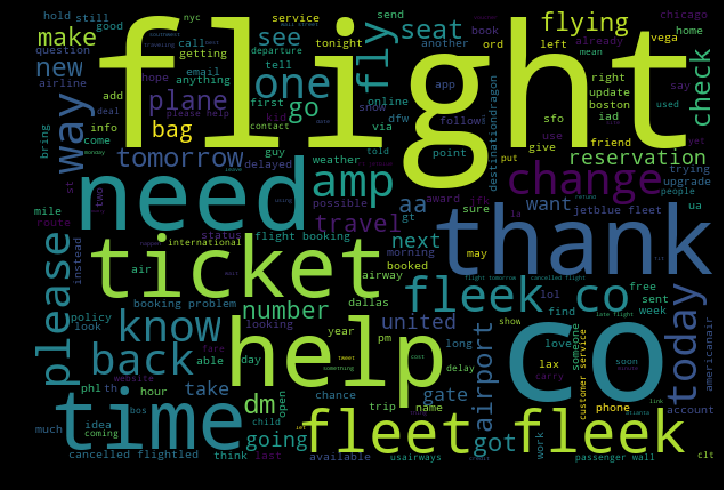

In [14]:
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(neutral_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

## Positive Sentiments WordCloud

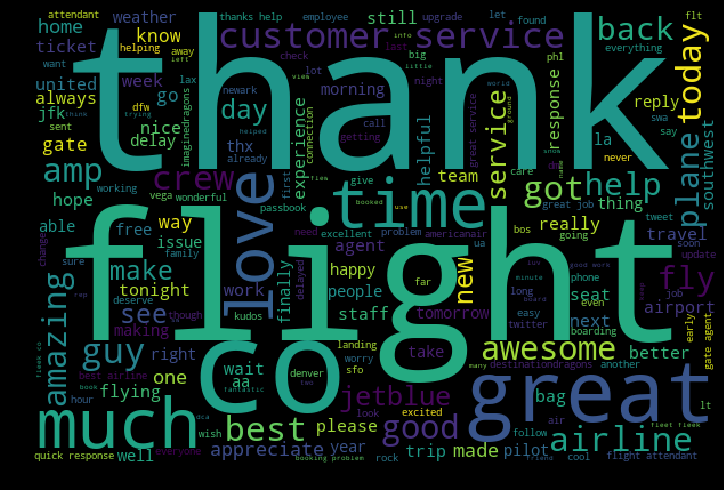

In [15]:
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(positive_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


## Negative Sentiments WordCloud

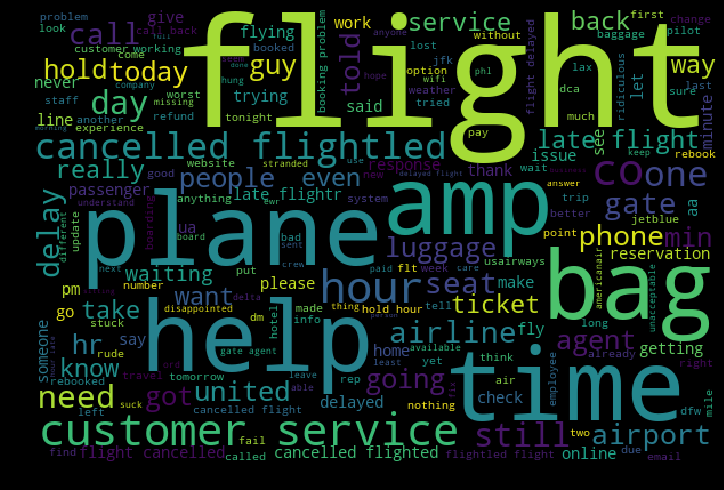

In [16]:
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(negative_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# Classification

## Converting sentences into vectors in order to feed it to Naive Bayes and SVM
## Splitting data into training and test data ( test_size = 0.2 )

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn import metrics
data['text'] = data['text'].apply(lambda x: x.lower())
data['text'] = data['text'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))
X_train,X_test,y_train,y_test = train_test_split(data["text"],data["airline_sentiment"], test_size = 0.2, random_state = 10)
print("train tuples",X_train.shape)
print("test tuples",X_test.shape)
print("train labels",y_train.shape)
print("test labels",y_test.shape)
vect = CountVectorizer()
vect.fit(X_train)
X_train_df = vect.transform(X_train)
X_test_df = vect.transform(X_test)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


train tuples (11712,)
test tuples (2928,)
train labels (11712,)
test labels (2928,)


## Model 1 - Naive Bayes

In [33]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_df,y_train)
result=model.predict(X_test_df)
print(metrics.classification_report(y_test, result))

              precision    recall  f1-score   support

           0       0.80      0.36      0.50       680
           1       0.85      0.51      0.63       467
           2       0.74      0.98      0.85      1781

   micro avg       0.76      0.76      0.76      2928
   macro avg       0.80      0.62      0.66      2928
weighted avg       0.77      0.76      0.73      2928



In [19]:
print("Accuracy Score:",accuracy_score(y_test,result))

Accuracy Score: 0.7609289617486339


![](http://)## Accuracy = 76.09%

In [28]:
## Logistic Regression

In [32]:
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, multi_class='ovr').fit(X_train_df,y_train)
result=clf.predict(X_test_df)
print("Accuracy Score:",accuracy_score(y_test,result))
print(metrics.classification_report(y_test, result))



/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy Score: 0.79474043715847
              precision    recall  f1-score   support

           0       0.69      0.57      0.63       680
           1       0.75      0.69      0.72       467
           2       0.83      0.91      0.87      1781

   micro avg       0.79      0.79      0.79      2928
   macro avg       0.76      0.72      0.74      2928
weighted avg       0.79      0.79      0.79      2928



In [30]:
# Decision Tree
from sklearn import tree
from sklearn import metrics
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train_df,y_train)
result=clf.predict(X_test_df)
print("Accuracy Score:",accuracy_score(y_test,result))
print(metrics.classification_report(y_test, result))

Accuracy Score: 0.6987704918032787
              precision    recall  f1-score   support

           0       0.53      0.48      0.50       680
           1       0.58      0.54      0.56       467
           2       0.78      0.83      0.80      1781

   micro avg       0.70      0.70      0.70      2928
   macro avg       0.63      0.61      0.62      2928
weighted avg       0.69      0.70      0.69      2928



In [39]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=16)
clf = clf.fit(X_train_df,y_train)
result=clf.predict(X_test_df)
print("Accuracy Score:",accuracy_score(y_test,result))
print(metrics.classification_report(y_test, result))

Accuracy Score: 0.42213114754098363
              precision    recall  f1-score   support

           0       0.32      0.57      0.41       680
           1       0.29      0.71      0.41       467
           2       0.91      0.29      0.44      1781

   micro avg       0.42      0.42      0.42      2928
   macro avg       0.51      0.52      0.42      2928
weighted avg       0.67      0.42      0.43      2928



## Model 2 - SVM

In [21]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train_df,y_train)
result=clf.predict(X_test_df)

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


## Accuracy = 60.82%

In [22]:
print("Accuracy Score:",accuracy_score(y_test,result))


Accuracy Score: 0.6082650273224044


## Model 3 - LSTM

In [23]:
import keras
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, SpatialDropout1D
from keras.callbacks import ModelCheckpoint
import os
from sklearn.metrics import roc_auc_score
from keras.preprocessing.text import Tokenizer
max_fatures = 2000
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(data['text'].values)
X = tokenizer.texts_to_sequences(data['text'].values)
X = pad_sequences(X)

embed_dim = 128
lstm_out = 196

model = Sequential()
model.add(Embedding(max_fatures, embed_dim,input_length = X.shape[1]))
model.add(Dropout(0.5))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Y = pd.get_dummies(data['airline_sentiment']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 32, 128)           256000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 128)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 196)               254800    
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 591       
Total params: 511,391
Trainable params: 511,391
Non-trainable params: 0
_________________________________________________________________
None


## Fitting Model
### Accuracy Achieved = 81.11%

In [24]:
batch_size = 256
history = model.fit(X_train, 
                    Y_train, 
                    epochs = 10, 
                    batch_size=batch_size, 
                    validation_data=(X_test, Y_test))

Instructions for updating:
Use tf.cast instead.
Train on 11712 samples, validate on 2928 samples
Epoch 1/10
11712/11712 [==============================] - 17s 1ms/step - loss: 0.8499 - acc: 0.6434 - val_loss: 0.7068 - val_acc: 0.7145
Epoch 2/10
11712/11712 [==============================] - 27s 2ms/step - loss: 0.6443 - acc: 0.7330 - val_loss: 0.5704 - val_acc: 0.7732
Epoch 3/10
11712/11712 [==============================] - 18s 2ms/step - loss: 0.5345 - acc: 0.7859 - val_loss: 0.5226 - val_acc: 0.7968
Epoch 4/10
11712/11712 [==============================] - 15s 1ms/step - loss: 0.4732 - acc: 0.8192 - val_loss: 0.4952 - val_acc: 0.8060
Epoch 5/10
11712/11712 [==============================] - 15s 1ms/step - loss: 0.4253 - acc: 0.8341 - val_loss: 0.4990 - val_acc: 0.8050
Epoch 6/10
11712/11712 [==============================] - 15s 1ms/step - loss: 0.4005 - acc: 0.8459 - val_loss: 0.4974 - val_acc: 0.8019
Epoch 7/10
11712/11712 [==============================] - 15s 1ms/step - loss: 0.

### Model 3 - Accuracy Graph

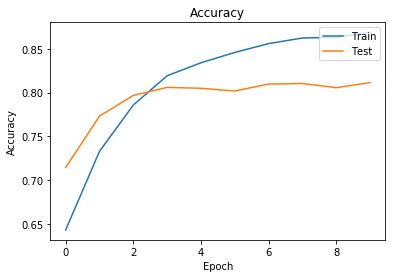

In [25]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# Results

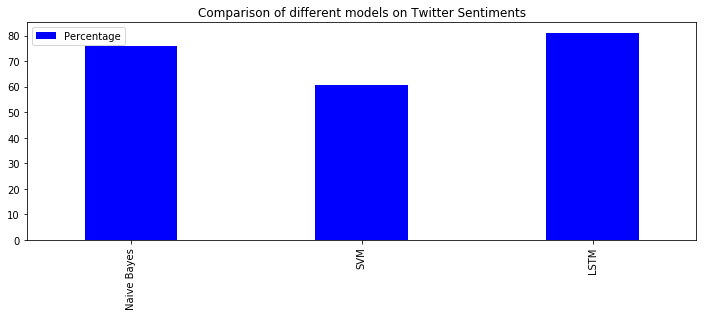

In [26]:
models = ['Naive Bayes','SVM','LSTM']
accuracy = [76.09,60.82,81.11]
result_frame = pd.DataFrame(data = accuracy,index = models)

fig, ax = subplots()
my_colors =['blue','red','green']
result_frame.plot(kind='bar', stacked=False, ax=ax, color=my_colors, figsize=(12, 4), width=0.4)
ax.legend(["Percentage"])
plt.title("Comparison of different models on Twitter Sentiments")
plt.show()

### Conclusion
As we can see from graph that deep learning model (LSTM) outperforms other two models in terms of accuracy